#### Imports

In [1]:
%matplotlib inline

import numpy as np
np.set_printoptions(suppress=True) # suppress scientific notation in NumPy output
  # see the following discussion for more information
  # https://stackoverflow.com/questions/9777783/suppress-scientific-notation-in-numpy-when-creating-array-from-nested-list
import numpy.random as npr
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
#plt.style.available # display available styles
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

---
---
---

# Table of Contents

1. EDA Exploratory Data Analysis and Summary Statistics
2. Data Preprocessing and Feature Engineering
3. ML Machine Learning Framework
4. Regression
5. Supervised ML: Classification
    - Binary Classification Performance Evaluation
    - Multiclass Classification Performance Evaluation
6. Probability Theory
7. Stochastic Processes and Time Series
8. DSP Digital Signal Processing and Filters
9. Resources

---
---
---

# Data Preprocessing and Feature Engineering [Wiki](https://en.wikipedia.org/wiki/Feature_engineering)

Centering<br>
Dimensionality Reduction<br>
Normalization<br>

---
---
---

# EDA Exploratory Data Analysis and Summary Statistics

Dataset $\{x_1, x_2, ..., x_n\}$ <br>
Observation $x_i$

k-th Quantile
$x_i$ s.t. $\left(\frac{100}{q}k\right)$% of the data values are $\leq x_i$ and $(100 - \frac{100}{q}k)$% of the data values are $\geq x_i$ where $0 \leq k \leq q$ <br>
k-th Percentile
$x_i$ s.t. $k$% of the data values are $\leq x_i$ and $(100 - k)$% of the data values are $\geq x_i$ where $0 \leq k \leq 100$ <br>
k-th Quartile
$x_i$ s.t. $(25k)$% of the data values are $\leq x_i$ and $(100 - 25k)$% of the data values are $\geq x_i$ where $0 \leq k \leq 4$ <br>

Count $n$ <br>
Median (or 50th Percentile) $M$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    If $n$ is odd, then $M = x_i$ s.t. $x_i$ is the $\frac{(n + 1)}{2}$-th element <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    If $n$ is even, then $M$ is the average of the $\frac{n}{2}$-th and $\frac{n}{2} + 1$-th elements <br>
Mode <br>
Minimum <br>
Maximum <br>
Range $= \text{max} - \text{min}$ <br>
Lower Quartile (or 25th Percentile) Q$_1$ <br>
Upper Quartile (or 75th Percentile) Q$_3$ <br>
Interquartile Range IQR $=$ Q$_3$ - Q$_1$ <br>
Outlier $x_i \in \{x_i $ s.t. $ x_i \lt \text{Q}_1 - 1.5\times\text{IQR} $ or $ x_i \gt \text{Q}_3 + 1.5\times\text{IQR}\}$

Sample Mean $\bar{x} = \frac{\sum x_i}{n}$ <br>
Sample Standard Deviation $s = \sqrt{\frac{\sum(x_i - \bar{x})^2}{n - 1}}$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 1. Calculate the sample mean. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 2. For each observation, calculate the difference between the data value and the mean. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 3. Square each difference calculated in step 2. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 4. Sum the squared differences calculated in step 3, and then divide this sum by n - 1. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 5. Take the square root of the variance calculated in step 4. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    For normally distributed $n \geq 200$, $s \approx \frac{\text{Range}}{6}$<br>
Sample Variance $s^2 = \frac{\sum(x_i - \bar{x})^2}{n - 1}$ <br>

Population Mean $\mu$ <br>
Population Standard Deviation $\sigma = \sqrt{\frac{\sum(x_i - \mu)^2}{n}}$ <br>
Population Variance $\sigma^2$ <br>

Standardized z-Score $z = \frac{x_i - \bar{x}}{s}$

Simple Linear Regression $\hat{y} = b_0 + b_1x$ <br>
Least Squares (Least Sum of Squared Errors) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    $b_1 = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    $b_0 = \bar{y} - b_1\bar{x}$ <br>
Residual (Prediction Error) $= y - \hat{y}$ <br>
Sum of Squared Errors SSE $= \sum (y - \hat{y})^2$ <br>

Pearson's Product-Moment Correlation Coefficient $r = \frac{1}{n - 1} \sum_i \left(\frac{x_i - \bar{x}}{s_x}\right)\left(\frac{y_i - \bar{y}}{s_y}\right)$ where $-1 \leq r \leq 1$ <br>
Squared Correlation $r^2$ where $0 \leq r^2 \leq 1$ <br>
Covariance <br>

Skewness [Wiki](https://en.wikipedia.org/wiki/Skewness)<br>

---
---
---

# ML Machine Learning Framework

A __machine learning algorithm__ is an algorithm that is capable of improving a computer program's performance at some task via experience<br>

---
---
---

# Regression

---

### Linear Regression

given: input vector $X^T = (X_1, ..., X_p) \in \mathbb{R}^p$<br>
objective: predict a real-valued output $Y \in \mathbb{R}$<br>
output: a linear function of the input<br>

__Linear Regression Model__<br>
$$
\begin{align}
f(X)
& = \beta_0 + \sum_{j = 1}^p X_j \beta_j \\
& = \beta_0 + X_1 \beta_1 + ... + X_j \beta_j \\
\end{align}
$$

assumption: the regression function $\text{E}(Y|X)$ is linear or the linear model is a reasonable approximation<br>

the variables $X_j$ can come from different sources:<br>
  1. quantitative inputs
  2. transformations of quantitative inputs, such as log, square-root, or square
  3. basis expansions, such as $X_2 = X_1^2$, $X_3 = X_1^3$, leading to a polynomial representation
  4. numeric or "dummy" coding of the levels of qualitative inputs. For example, if $G$ is a five-level factor input, we might create $X_j$, $j = 1, ..., 5$, such that $X_j = I(G = j)$. Together this group of $X_j$ represents the effect of $G$ by a set of level-dependent constants, since in $\sum_{j = 1}^5 X_j \beta_j$, one of the $X_j$s is one, and the others are zero
  5. interactions between variables, for example, $X_3 = X_1 \cdot X_2$
  
no matter the source of the $X_j$, the model is linear in the parameters<br>


Let $\textbf{X}_{[N \times (p + 1)]}$ be the $N \times (p + 1)$ matrix with each row an input vector<br>
$$
\textbf{X}
=
\begin{bmatrix}
X_1 & ... & X_{p + 1} \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & ... & x_{1, p + 1} \\
... & ... & ... \\
x_{N1} & ... & x_{N, p + 1} \\
\end{bmatrix}
$$
Let $\textbf{y}_{[N \times 1]}$ be the $N$-vector of outputs in the training set<br>


the $\beta_j$s are unknown parameters or coefficients<br>
Training Data may be used to estimate the parameters $\beta$<br>
$$x = {(x_1, y_1), ..., (x_N, y_N)}$$
$$x_i = (x_{i1}, ..., x_{ip})^T$$
Parameter Estimation Methods:<br>
  1. Least Squares
 
__Least Squares Optimality Criterion__<br>
pick the coefficients $\beta = (\beta_0, ..., \beta_p)^T$ to minimize the residual sum of squares

__Residual__<br>
$$\hat{y} - y$$

__RSS Residual Sum of Squares__<br>
measures the average lack of fit<br>
$$
\begin{align}
\text{RSS}(\beta)
&= \sum_{i = 1}^N (y_i - f(x_i))^2 \\
&= \sum_{i = 1}^N \left(y_i - \beta_0 - \sum_{j = 1}^p x_{ij} \beta_j \right)^2 \\
&= (\textbf{y} - \textbf{X}\beta)^T (\textbf{y} - \textbf{X}\beta)
& \,\,\,\text{this is a quadratic function in the}\, p + 1 \,\text{parameters} \\
&= (\textbf{y}^T - \beta^T\textbf{X}^T) (\textbf{y} - \textbf{X}\beta) \\
&= \textbf{y}^T\textbf{y} - \textbf{y}^T\textbf{X}\beta - \beta^T\textbf{X}^T\textbf{y} + \beta^T\textbf{X}^T\textbf{X}\beta \\
&= \textbf{y}^T\textbf{y} - (\textbf{y}^T\textbf{X}\beta)^T - \beta^T\textbf{X}^T\textbf{y} + \beta^T\textbf{X}^T\textbf{X}\beta \\
&= \textbf{y}^T\textbf{y} - \beta^T\textbf{X}^T\textbf{y} - \beta^T\textbf{X}^T\textbf{y} + \beta^T\textbf{X}^T\textbf{X}\beta \\
&= \textbf{y}^T\textbf{y} - 2\beta^T\textbf{X}^T\textbf{y} + \beta^T\textbf{X}^T\textbf{X}\beta \\
\frac{\partial \text{RSS}}{\partial \beta} &= -2\textbf{X}^T\textbf{y} + 2\textbf{X}^T\textbf{X}\beta \\
&= -2\textbf{X}^T (\textbf{y} - \textbf{X} \beta)
& \text{first partial derivative with respect to}\, \beta \\
\frac{\partial^2 \text{RSS}}{\partial \beta \partial \beta^T} &= 2\textbf{X}^T \textbf{X}
& \text{second partial derivative with respect to}\, \beta \\
0 &= \textbf{X}^T (\textbf{y} - \textbf{X} \beta)
& \text{set the first partial derivative to zero assuming X has full column rank} \\
\hat{\beta} &= (\textbf{X}^T\textbf{X})^{-1} \textbf{X}^T \textbf{y}
& \text{unique solution} \\
\hat{\textbf{y}} = \textbf{X} \hat{\beta} &= \textbf{X} (\textbf{X}^T\textbf{X})^{-1} \textbf{X}^T \textbf{y}
\,\text{where}\, \hat{y}_i = \hat{f}(x_i)
& \text{the fitted values at the training inputs} \\
\hat{\textbf{y}} = \textbf{Hy} &= \textbf{X} (\textbf{X}^T\textbf{X})^{-1} \textbf{X}^T \textbf{y}
& \text{Hat matrix}\, \textbf{H} = \textbf{X} (\textbf{X}^T\textbf{X})^{-1} \textbf{X}^T \\
\end{align}
$$

---

__Linear Regression in $\mathbb{R}^2$__
$$
\begin{align}
f(X)
& = \beta_0 + \sum_{j = 1}^1 X_j \beta_j \\
& = \beta_0 + X_1 \beta_1 \\
\end{align}
$$

$$
\textbf{X}
=
\begin{bmatrix}
X_1 \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} \\
... \\
x_{N1} \\
\end{bmatrix}
$$

---

__Linear Regression in $\mathbb{R}^3$__
$$
\begin{align}
f(X)
& = \beta_0 + \sum_{j = 1}^2 X_j \beta_j \\
& = \beta_0 + X_1 \beta_1 + X_2 \beta_2 \\
\end{align}
$$

$$
\textbf{X}
=
\begin{bmatrix}
X_1 & X_{2} \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} \\
... & ... \\
x_{N1} & x_{N2} \\
\end{bmatrix}
$$

---

Linear Regression example implemented in scikit-learn

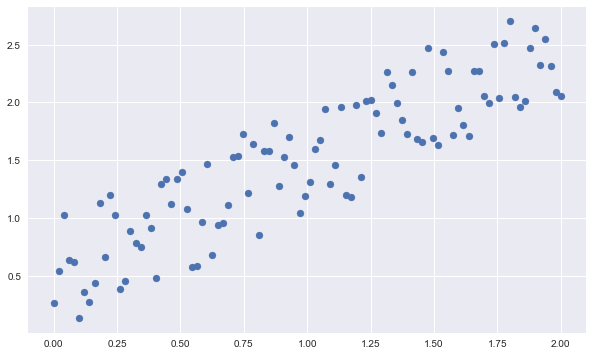

In [2]:
x = np.linspace(0, 2, 100)
y = npr.random(100) + x
plt.scatter(x, y);

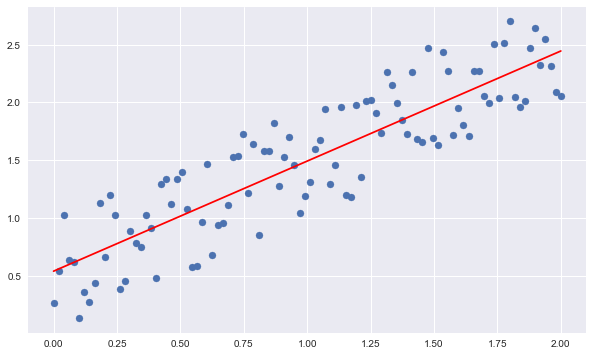

In [3]:
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y);
m = model.coef_
b = model.intercept_
predicted_y = model.predict(x)
plt.scatter(x, y);
plt.plot(x, predicted_y, color='red');

In [4]:
score = model.score(x, y, sample_weight=None)
r2 = r2_score(y, predicted_y)
mse = mean_squared_error(y, predicted_y)
rmse = np.sqrt(mse)
std = np.std(y)
display(
    score,
    r2,
    mse,
    rmse,
    std
)

0.7775197882509696

0.7775197882509696

0.0882538253249571

0.29707545392535734

0.6298267104697294

---
---
---

# Supervised ML: Classification

---

__Classification__<br>
Binary Classification<br>
Multiclass Classification<br>

---

### Classifiers

__ANN Artificial Neural Network__<br>
__Decision Tree__<br>
__Probabilistic Discriminative Model__<br>
a probabilistic classification model that directly assigns class labels without computing class-conditional probabilities<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Logistic Regression<br>
__Probabilistic Generative Model__<br>
a probabilistic classification model that involves computing class-conditional probabilities<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Bayesian Classifiers<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Bayesian Network<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Naive Bayes<br>
__SVM Support Vector Machine__<br>

---

## Binary Classification Performance Evaluation [Wiki](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers)

<table>
    <tr>
        <td>
<table>
    <caption>Binary Confusion Matrix</caption>
    <!-- the number of columns in the table -->
    <col>
    <col>
    <colgroup span="2"></colgroup>
    <thead>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="2" scope="colgroup">Predicted</th>
        </tr>
        <tr>
            <th scope="col">+</th>
            <th scope="col">-</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="4" scope="rowgroup">Actual</th>
            <th scope="row" style="border-right: 1px solid black;">+</th>
            <td style="background-color: coral;">$$\text{TP}$$</td>
            <td>$$\text{FN}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">-</th>
            <td>$$\text{FP}$$</td>
            <td style="background-color: coral;">$$\text{TN}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
    </tbody>
</table>
        </td><td>
<table>
    <caption>Binary Confusion Matrix</caption>
    <!-- the number of columns in the table -->
    <col>
    <col>
    <colgroup span="2"></colgroup>
    <thead>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="2" scope="colgroup">Predicted</th>
        </tr>
        <tr>
            <th scope="col">0</th>
            <th scope="col">1</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="4" scope="rowgroup">Actual</th>
            <th scope="row" style="border-right: 1px solid black;">0</th>
            <td style="background-color: coral;">$$f_{00}$$</td>
            <td>$$f_{01}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">1</th>
            <td>$$f_{10}$$</td>
            <td style="background-color: coral;">$$f_{11}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
    </tbody>
</table>
        </td>
    </tr>
</table>

$f_{ij}$ is the number of instances from class $i$ predicted to be of class $j$ (here, class 0 is positive and class 1 is negative)<br>

__TP True Positive__ is the number of positive examples correctly predicted by the classifier $f_{00}$<br>

__FP False Positive (Type I Error)__ is the number of negative examples wrongly predicted as positive by the classifier $f_{10}$<br>

__FN False Negative (Type II Error)__ is the number of positive examples wrongly predicted as negative by the classifier $f_{01}$<br>

__TN True Negative__ is the number of negative examples correctly predicted by the classifier $f_{11}$<br>

__$\text{T}$ number of correct predictions made by the model__<br>
$$
\begin{align}
\text{T} &\equiv \text{TP} + \text{TN} \\
&= \sum f_{ij} \,(\text{where}\, i = j) \\
&= \sum_{i = 0}^1 f_{ii} \\
&= f_{00} + f_{11} \\
\end{align}
$$

__$\text{F}$ number of incorrect predictions made by the model__<br>
$$
\begin{align}
\text{F} &\equiv \text{FN} + \text{FP} \\
&= \sum f_{ij} \,(\text{where}\, i \ne j) \\
&= \sum_{j \ne i}^1 \sum_{i \ne j}^1 f_{ij} \\
&= \sum_{j \ne i}^1 (f_{0j} + f_{1j}) \\
&= \sum_{j \ne i}^1 f_{0j} + \sum_{j \ne i}^1 f_{1j} \\
&= f_{01} + f_{10} \\
\end{align}
$$

__$\text{N}$ number of predictions made by the model__<br>
$$
\begin{align}
\text{N} &\equiv \text{T} + \text{F} \\
&= \text{TP} + \text{FP} + \text{FN} + \text{TN} \\
&= \sum f_{ij} \\
&= \sum_{j = 0}^1 \sum_{i = 0}^1 f_{ij} \\
&= \sum_{j = 0}^1 (f_{0j} + f_{1j}) \\
&= \sum_{j = 0}^1 f_{0j} + \sum_{j = 0}^1 f_{1j} \\
&= f_{00} + f_{01} + f_{10} + f_{11} \\
\end{align}
$$

__Skew__ $\alpha$ is the ratio of positive data objects to all data objects<br>
$$
\begin{align}
\alpha &= \frac{P}{P + N} & \text{where}\, P \,\text{is the number of actual positives and}\, N \,\text{is the number of actual negatives}
\end{align}
$$

#### Evaluation Measures

__Accuracy__ $a$ is the ratio of correct predictions to all predictions, and takes a value $\in [0, 1]$, where $a = 1$ is a perfect accuracy<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
suitable for balanced classes; not suitable for imbalanced classes, since it favors classifiers that correctly classify the majority class<br>

$$
\begin{align}
a
&= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}} \\
&= \frac{\text{T}}{\text{N}} \\
\end{align}
$$

__Error Rate__ $e$ is the ratio of incorrect predictions to all predictions, and takes a value $\in [0, 1]$, where $e = 1$ is a perfect error rate<br>
$$
\begin{align}
e
&= 1 - a
& \text{as the accuracy gets closer to unity, the error rate gets closer to zero, and vice versa} \\
&= \frac{\text{FP} + \text{FN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}} \\
&= \frac{\text{F}}{\text{N}} \\
\end{align}
$$



__Precision__ $p$ (PPV Positive Predicted Value) is the ratio of correct predictions of the positive class to the total number of positive predictions<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
sensitive to skew: precision is a useful measure for highly skewed test sets where the positive predictions, even though small in number, are required to be mostly correct<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
a classifier that has a high precision is likely to have most of its positive predictions correct<br>

$$p = \frac{\text{TP}}{\text{TP} + \text{FP}}$$



__FDR False Discovery Rate__<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is sensitive to the skew<br>

$$
\begin{align}
\text{FDR}
&= 1 - p \\
&= \frac{\text{FP}}{\text{TP} + \text{FP}} \\
\end{align}
$$



_as the precision gets closer to unity, the false discovery rate gets closer to zero, and vice versa_<br>



__TPR True Positive Rate (Recall or Sensitivity)__<br>
the fraction of positive test instances correctly predicted by the classifier<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
a classifier with a high TPR has a high chance of correctly identifying the positive instances of the data<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is not sensitive to the skew<br>

$$
\begin{align}
\text{TPR}
&= \frac{\text{TP}}{\text{TP} + \text{FN}} \\
&= \frac{\text{TP}}{P} \\
\end{align}
$$



__TNR True Negative Rate (Specificity)__<br>
the fraction of negative test instances correctly predicted by the classifier<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
a high TNR value signifies that the classifier correctly classifies any randomly chosen negative instance in the test set<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is not sensitive to the skew<br>

$$
\begin{align}
\text{TNR}
&= \frac{\text{TN}}{\text{FP} + \text{TN}} \\
&= \frac{\text{TN}}{N} \\
\end{align}
$$



__FPR False Positive Rate__<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is not sensitive to the skew<br>

$$
\begin{align}
\text{FPR}
&= 1 - \text{TNR} \\
&= \frac{\text{FP}}{\text{FP} + \text{TN}} \\
&= \frac{\text{FP}}{N} \\
\end{align}
$$



__FNR False Negative Rate__<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is not sensitive to the skew<br>

$$
\begin{align}
\text{FNR}
&= 1 - \text{TPR} \\
&= \frac{\text{FN}}{\text{FN} + \text{TP}} \\
&= \frac{\text{FN}}{P} \\
\end{align}
$$



<table>
    <caption>Binary Confusion Matrix</caption>
    <!-- the number of columns in the table -->
    <col>
    <col>
    <colgroup span="2"></colgroup>
    <thead>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="2" scope="colgroup">Predicted</th>
        </tr>
        <tr>
            <th scope="col">+</th>
            <th scope="col">-</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="4" scope="rowgroup">Actual</th>
            <th scope="row" style="border-right: 1px solid black;">+</th>
            <td style="background-color: coral;">$$\text{TPR} \times \alpha \times \text{N}$$</td>
            <td>$$(1 - \text{TPR}) \times \alpha \times \text{N}$$</td>
            <td>$$\alpha \times \text{N}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">-</th>
            <td>$$(1 - \text{TNR}) \times (1 - \alpha) \times \text{N}$$</td>
            <td style="background-color: coral;">$$\text{TNR} \times (1 - \alpha) \times \text{N}$$</td>
            <td>$$(1 - \alpha) \times \text{N}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
    </tbody>
    <tbody>
        <tr>
            <th rowspan="2" scope="rowgroup">Total</th>
            <td style="border-right: 1px solid black;"></td>
            <td></td>
            <td></td>
            <td>$$\text{N}$$</td>
        </tr>
    </tbody>
</table>

PLR __Positive Likelihood Ratio__ [Wiki](https://en.wikipedia.org/wiki/Likelihood_function#Likelihood_ratio) [Wiki](https://en.wikipedia.org/wiki/Likelihood_ratios_in_diagnostic_testing)<br>
not sensitive to skew<br>
$$\text{PLR} = \frac{\text{TPR}}{\text{FPR}}$$

$F_1$ __Measure__ [Wiki](https://en.wikipedia.org/wiki/F-score)<br>
represents a harmonic mean between recall and precision<br>
a high $F_1$-measure value ensures that both precision and recall are reasonably high, since the harmonic mean of two numbers tends to be closer to the smaller of the two numbers<br>
sensitive to skew<br>
$$
\begin{align}
F_1
&= \frac{2rp}{r + p} = \frac{2}{\frac{1}{r} + \frac{1}{p}}\\
&= \frac{2 \times \text{TP}}{2 \times \text{TP} + \text{FP} + \text{FN}} \\
&= \frac{2 \times f_{00}}{2 \times f_{00} + f_{10} + f_{01}} \\
\end{align}
$$

$G$ __Measure__<br>
represents the geometric mean between recall and precision<br>
$$
\begin{align}
G
&= \sqrt{rp} \\
&= \frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})}} \\
&= \frac{f_{00}}{\sqrt{(f_{00} + f_{10})(f_{00} + f_{01})}} \\
\end{align}
$$

---

In [5]:
a = 1
b = 5
mu_a = (a + b) / 2         # arithmetic mean
mu_g = np.sqrt(a * b)      # geometric mean
mu_h = 2 * a * b / (a + b) # harmonic mean
display(mu_a, mu_g, mu_h)

3.0

2.23606797749979

1.6666666666666667

---

In [6]:
c1 = 1
c2 = 1

TP = int(3e1 * c1)
FP = int(2e1 * c2)
FN = int(0 * c1)
TN = int(5e1 * c2)

T  = int(TP + TN) # correct
F  = int(FP + FN) # incorrect
AP = int(TP + FN) # actual positive
AN = int(TN + FP) # actual negative
PP = int(TP + FP) # predicted positive
PN = int(TN + FN) # predicted negative
N  = int(TP + FP + FN + TN) # all

alpha = AP / N

accuracy             = T / N   # correct over all
error_rate           = F / N   # incorrect over all
precision            = TP / PP # correct positive over all positive
false_discovery_rate = FP / PP # incorrect positive over all positive

true_positive_rate   = TP / AP # correct positive over actual positive
false_negative_rate  = FN / AP # incorrect negative over actual positive
true_negative_rate   = TN / AN # correct negative over actual negative
false_positive_rate  = FP / AN # incorrect positive over actual negative

lines = [
    '{}\t{}\t{}\t{}'.format('', 'pred+', 'pred-', ''),
    '{}\t{}\t{}\t{}'.format('act+', TP, FN, AP),
    '{}\t{}\t{}\t{}'.format('act-', FP, TN, AN),
    '\t\t\t{}'.format(N),
    '',
    '{:5}{:0.3f}'.format('\u03b1', np.round(alpha, 3)),
    '',
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('a', np.round(accuracy, 3), 'e', np.round(error_rate, 3)),
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('p', np.round(precision, 3), 'fdr', np.round(false_discovery_rate, 3)),
    '',
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('r', np.round(true_positive_rate, 3), 'fnr', np.round(false_negative_rate, 3)),
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('tnr', np.round(true_negative_rate, 3), 'fpr', np.round(false_positive_rate, 3)),
]
for line in lines:
    print(line)

	pred+	pred-	
act+	30	0	30
act-	20	50	70
			100

α    0.300

a    0.800	e    0.200
p    0.600	fdr  0.400

r    1.000	fnr  0.000
tnr  0.714	fpr  0.286


---

## Multiclass Classification Performance Evaluation

each entry $f_{ij}$ is the number of instances from class $i$ predicted to be of class $j$<br>

<table>
    <caption>Multiclass Confusion Matrix</caption>
    <!-- the number of columns in the table -->
    <col>
    <col>
    <colgroup span="5"></colgroup>
    <thead>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="5" scope="colgroup">Predicted</th>
        </tr>
        <tr>
            <th scope="col">0</th>
            <th scope="col">1</th>
            <th scope="col">2</th>
            <th scope="col">...</th>
            <th scope="col">k</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="9" scope="rowgroup">Actual</th>
            <th scope="row" style="border-right: 1px solid black;">0</th>
            <td style="background-color: coral;">$$f_{00}$$</td>
            <td>$$f_{01}$$</td>
            <td>$$f_{02}$$</td>
            <td>$$...$$</td>
            <td>$$f_{0k}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">1</th>
            <td>$$f_{10}$$</td>
            <td style="background-color: coral;">$$f_{11}$$</td>
            <td>$$f_{12}$$</td>
            <td>$$...$$</td>
            <td>$$f_{1k}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">2</th>
            <td>$$f_{20}$$</td>
            <td>$$f_{21}$$</td>
            <td style="background-color: coral;">$$f_{22}$$</td>
            <td>$$...$$</td>
            <td>$$f_{2k}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">$$\vdots$$</th>
            <td>$$\vdots$$</td>
            <td>$$\vdots$$</td>
            <td>$$\vdots$$</td>
            <td>$$\ddots$$</td>
            <td>$$\vdots$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">k</th>
            <td>$$f_{k0}$$</td>
            <td>$$f_{k1}$$</td>
            <td>$$f_{k2}$$</td>
            <td>$$...$$</td>
            <td style="background-color: coral;">$$f_{kk}$$</td>
        </tr>
    </tbody>
</table>

__$\text{T}$ number of correct predictions made by the model__<br>
$$
\begin{align}
& \sum f_{ij} \,(\text{where}\, i = j) \\
&= \sum_{i = 0}^k f_{ii} \\
&= f_{00} + f_{11} + ... + f_{kk}
& k \,\text{times} \\
&= \text{T}
& k \,\text{terms} \\
\end{align}
$$

__$\text{F}$ number of incorrect predictions made by the model__<br>
$$
\begin{align}
& \sum f_{ij} \,(\text{where}\, i \ne j) \\
&= \sum_{j \ne i}^k \sum_{i \ne j}^k f_{ij} \\
&= \sum_{j \ne i}^k (f_{0j} + f_{1j} + ... + f_{kj}) \\
&= \sum_{j \ne i}^k f_{0j} + \sum_{j \ne i}^k f_{1j} + ... + \sum_{j \ne i}^k f_{kj} \\
&= \underbrace{(f_{01} + f_{02} + ... + f_{0k})}_{k - 1 \,\text{terms}} + \underbrace{(f_{10} + f_{12} + ... + f_{1k})}_{k - 1 \,\text{terms}} + ... + \underbrace{(f_{k0} + f_{k1} + ... + f_{k, k - 1})}_{k - 1 \,\text{terms}}
& k \,\text{times} \\
&= \text{F}
& k(k - 1) = k^2 - k \,\text{terms}\\
\end{align}
$$

__$\text{N}$ number of predictions made by the model__<br>
$$
\begin{align}
& \sum f_{ij} \\
&= \sum_{j = 0}^k \sum_{i = 0}^k f_{ij} \\
&= \sum_{j = 0}^k (f_{0j} + f_{1j} + ... + f_{kj}) \\
&= \sum_{j = 0}^k f_{0j} + \sum_{j = 0}^k f_{1j} + ... + \sum_{j = 0}^k f_{kj} \\
&= \underbrace{(f_{00} + f_{01} + ... + f_{0k})}_{k \,\text{terms}} + \underbrace{(f_{10} + f_{11} + ... + f_{1k})}_{k \,\text{terms}} + ... + \underbrace{(f_{k0} + f_{k1} + ... + f_{kk})}_{k \,\text{terms}}
& k \,\text{times} \\
&= \text{T} + \text{F} \\
&= \text{N}
& k^2 \,\text{terms}\\
\end{align}
$$

#### Evaluation Measures

__Accuracy__ $a$<br>
$$
\begin{align}
a
&= \frac{\sum_{i = j} f_{ij}}{\sum f_{ij}} \\
&= \frac{f_{00} + f_{11} + ... + f_{kk}}{(f_{00} + f_{01} + ... + f_{0k}) + (f_{10} + f_{11} + ... + f_{1k}) + ... + (f_{k0} + f_{k1} + ... + f_{kk})} \\
&= \frac{\text{T}}{\text{N}} \\
\end{align}
$$

__Error Rate__ $e$<br>
$$
\begin{align}
e
&= 1 - a \\
&= \frac{\sum_{i \ne j} f_{ij}}{\sum f_{ij}} \\
&= \frac{\underbrace{(f_{01} + f_{02} + ... + f_{0k})}_{k - 1 \,\text{terms}} + \underbrace{(f_{10} + f_{12} + ... + f_{1k})}_{k - 1 \,\text{terms}} + ... + \underbrace{(f_{k0} + f_{k1} + ... + f_{k, k - 1})}_{k - 1 \,\text{terms}}}{\underbrace{(f_{00} + f_{01} + ... + f_{0k})}_{k \,\text{terms}} + \underbrace{(f_{10} + f_{11} + ... + f_{1k})}_{k \,\text{terms}} + ... + \underbrace{(f_{k0} + f_{k1} + ... + f_{kk})}_{k \,\text{terms}}} \\
&= \frac{\text{F}}{\text{N}} \\
\end{align}
$$

---

In [7]:
f00 = 200
f01 = 5
f02 = 5
f10 = 5
f11 = 100
f12 = 5
f20 = 5
f21 = 5
f22 = 100

T  = int(f00 + f11 + f22) # correct
F  = int(f01 + f02 + f10 + f12 + f20 + f21) # incorrect
A0 = int(f00 + f01 + f02) # actual class 0
A1 = int(f10 + f11 + f12) # actual class 1
A2 = int(f20 + f21 + f22) # actual class 2

P0 = int(f00 + f10 + f20) # predicted class 0
P1 = int(f01 + f11 + f21) # predicted class 1
P2 = int(f02 + f12 + f22) # predicted class 2

N = int(A0 + A1 + A2) # all

alpha0 = A0 / N
alpha1 = A1 / N
alpha2 = A2 / N

accuracy             = T / N   # correct over all
error_rate           = F / N   # incorrect over all

'''
precision            = TP / PP # correct positive over all positive
false_discovery_rate = FP / PP # incorrect positive over all positive

true_positive_rate   = TP / AP # correct positive over actual positive
false_negative_rate  = FN / AP # incorrect negative over actual positive
true_negative_rate   = TN / AN # correct negative over actual negative
false_positive_rate  = FP / AN # incorrect positive over actual negative
'''

lines = [
    '{}\t{}\t{}\t{}\t{}'.format('', 'P0', 'P1', 'P2', ''),
    '{}\t{}\t{}\t{}\t{}'.format('A0', f00, f01, f02, A0),
    '{}\t{}\t{}\t{}\t{}'.format('A1', f10, f11, f12, A1),
    '{}\t{}\t{}\t{}\t{}'.format('A2', f20, f21, f22, A2),
    '\t\t\t\t{}'.format(N),
    '',
    '{:5}{:0.3f}'.format('\u03b10', np.round(alpha0, 3)),
    '{:5}{:0.3f}'.format('\u03b11', np.round(alpha1, 3)),
    '{:5}{:0.3f}'.format('\u03b12', np.round(alpha2, 3)),
    '',
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('a', np.round(accuracy, 3), 'e', np.round(error_rate, 3)),
]
for line in lines:
    print(line)

	P0	P1	P2	
A0	200	5	5	210
A1	5	100	5	110
A2	5	5	100	110
				430

α0   0.488
α1   0.256
α2   0.256

a    0.930	e    0.070


---

### Logistic Regression

a probabilistic discriminative model

__Odds__<br>
$$\frac{P(y = 1 | \textbf{x})}{P(y = 0 | \textbf{x})}$$

---

### Bayesian Classification

__Posterior Probability of the target class__<br>
compute the probability of observing a class label $y$ for a data instance given its set of attribute values $\textbf{x}$<br>
$$P(y | \textbf{x}) = \frac{P(\textbf{x} | y)P(y)}{P(\textbf{x})}$$

__Class-Conditional Probability of the attributes given the class label $P(\textbf{x} | y)$__<br>
measures the likelihood of observing $\textbf{x}$ from the distribution of instances belonging to $y$<br>
describes the behavior of instances in the attribute space that are _generated_ from class $y$<br>
if $\textbf{x}$ indeed belongs to class $y$, then we should expect $P(\textbf{x} | y)$ to be high<br>
the use of class-conditional probabilities attempts to capture the process from which the data instances were generated<br>
provide insights about the underlying mechanism behind the generation of attribute values<br>

__Prior Probability $P(y)$__<br>
captures our prior beliefs about the distribution of class labels, independent of the observed attribute values<br>
can either be obtained using expert knowledge, or inferred from historical distribution of class labels<br>

combine one's prior beliefs with the likelihood of obtaining the observed attribute values<br>
Training: learn the parameters for $P(y)$ and $P(\textbf{x} | y)$<br>
$P(y)$ is easily estimated from the training set by computing the fraction of training instances that belong to each class<br>

__Class-Conditional Probability Estimation__<br>
$P(\textbf{x} | y)$ is estimated by considering the fraction of training instances of a given class for every possible combination of attribute values:<br>
Let $X_1$ and $X_2$ be two attributes each of which can take a discrete value from $c_1$ to $c_k$<br>
Let $n^0$ denote the number of training instances belonging to class $0$, out of which $n_{ij}^0$ number of training instances have $X_1 = c_i$ and $X_2 = c_j$<br>
$$P(X_1 = c_i, X_2 = c_j | Y = 0) = \frac{n_{ij}^0}{n^0}$$

---

### Naive Bayes Classifier

__Naive Bayes Assumption__<br>
the class-conditional probability of all attributes $\textbf{x}$ can be factored as a product of class-conditional probabilities of every attribute $x_i$:
$$P(\textbf{x} | y) = \prod_{i = 1}^d P(x_i | y)$$
where every data instance $\textbf{x}$ consists of $d$ attributes $\{x_1, ..., x_d\}$<br>
assumption: the attribute values $x_i$ are conditionally independent of each other, given the class label $y$ (this means that the attributes are influenced only by the target class and if we know the class label, then we can consider the attributes to be independent of each other)<br>

given the naive Bayes assumption, we only need to estimate the conditional probability of each $x_i$ given $Y$ separately, instead of computing the class-conditional probability for every combination of attribute values<br>

__Class-Conditional Probability Estimation under the Naive Bayes Assumption__<br>
count the number of training instances for every one of the $k$ values of an attribute $X$ irrespective of the values of other attributes<br>
the number of parameters needed to learn class-conditional probabilities is $dk$, linear in the number of attributes<br>
$$P(X_1 = c_i, X_2 = c_j | Y = 0) = \frac{n_i^0}{n^0} \times \frac{n_j^0}{n^0}$$

__Naive Bayes Classifier__<br>
computes the posterior probability for a test instance $\textbf{x}$:
$$
\begin{align}
P(y | \textbf{x}) &= \frac{P(y) \prod_{i = 1}^d P(x_i | y)}{P(\textbf{x})} \\
P(y | \textbf{x}) &\propto P(y) \prod_{i = 1}^d P(x_i | y) \\
\end{align}
$$

__Categorical Attribute Conditional Probability Estimation__<br>
Let $X_i$ be a categorical attribute.<br>
The conditional probability $P(X_i = c | y)$ is estimated according to the fraction of training instances in class $y$ where $X_i$ takes on a particular categorical value $c$:<br>
$n$ is the number of training instances belonging to class $y$ out of which $n_c$ number of instances have $X_i = c$<br>
$\sum_c P(X_i = c | y) = 1$<br>
$$P(X_i = c | y) = \frac{n_c}{n}$$

---
---
---

# Probability Theory

Let $X$ be a variable that can take any discrete value from the set $\{x_1, ..., x_k\}$<br>

__Random Variable__<br>
a variable that has probabilities associated with each possible outcome/value<br>

__Relative Frequency__<br>
If $X$ has the value $x_i$ for $n_i$ data objects, then the relative frequency with which we observe the event $X = x_i$ is $\frac{n_i}{N}$ where $N = \sum_{i = 1}^k n_i$ is the total number of data objects (i.e., the size of the dataset).<br>

__Probability__<br>
The probability of an event $e$ (e.g., $P(X = x_i)$) measures how likely it is for the event $e$ to occur.<br>
The frequentist approach to probability is based on the relative frequency of events.<br>

__Axioms of Probability Theory__<br>
$$
\begin{align}
1. & P \in [0, 1] \\
2. & \sum_i P(X = x_i) = 1 \\
\end{align}
$$

__Joint Probability__<br>
Let $X$ and $Y$ be two random variables that can each take $k$ discrete values.<br>
Let $n_{ij}$ be the number of times we observe $X = x_i$ and $Y = y_j$ out of a total number of $N$ occurrences.<br>
$$P(X = x_i, Y = y_i) = \frac{n_{ij}}{N}$$
Symmetry of Joint Probability: $P(X = x_i, Y = y_i) = P( Y = y_i, X = x_i)$

__Marginal Probability of__ $X$<br>
$$\sum_{j = 1}^k P(X = x_i, Y = y_j) = \frac{\sum_{j = 1}^k n_{ij}}{N} = \frac{n_i}{N} = P(X = x_i)$$
where $n_i$ is the total number of times we observe $X = x_i$ irrespective of the value of $Y$ and
$\frac{n_i}{N}$ is the probability of observing the remaining variable $X$<br>

__Conditional Probability__<br>
Let $P(Y | X)$ be the conditional probability of observing the random variable $Y$ whenever the random variable $X$ takes a particular value (the probability of observing $Y$ conditioned on the outcome of $X$).<br>
$$
\begin{align}
P(Y | X) &= \frac{P(X, Y)}{P(X)} \\
P(X, Y) &= P(Y | X) \times P(X) \\
&= P(X | Y) \times P(Y) \\
\end{align}
$$

__Bayes Theorem__<br>
relates the conditional probabilities $P(Y | X)$ and $P(X | Y)$<br>
Likelihood $P(X | Y)$<br>
Prior $P(Y)$<br>
Posterior $P(Y | X)$<br>
Normalization Constant or Probability of Evidence $P(X)$ (the marginal probability of $X$)<br>
$$
\begin{align}
P(Y | X) &= \frac{P(X | Y)P(Y)}{P(X)} \\
&= \frac{P(X | Y)P(Y)}{\sum_{i = 1}^k P(X, y_i)} \\
&= \frac{P(X | Y)P(Y)}{\sum_{i = 1}^k P(X | y_i)P(y_i)} \\
\end{align}
$$

__Conditional Independence__<br>
Let $\textbf{X}_1$, $\textbf{X}_2$, and $\textbf{Y}$ be three sets of random variables.<br>
The variables in $\textbf{X}_1$ are conditionally independent of $\textbf{X}_2$, given $\textbf{Y}$, if:<br>
$$P(\textbf{X}_1 | \textbf{X}_2, \textbf{Y}) = P(\textbf{X}_1 | \textbf{Y})$$

__Joint Conditional Probability__<br>
$$
\begin{align}
P(\textbf{X}_1, \textbf{X}_2 | \textbf{Y}) &= \frac{P(\textbf{X}_1, \textbf{X}_2, \textbf{Y})}{P(\textbf{Y})} \\
&= \frac{P(\textbf{X}_1, \textbf{X}_2, \textbf{Y})}{P(\textbf{X}_2, \textbf{Y})} \times \frac{P(\textbf{X}_2, \textbf{Y})}{P(\textbf{Y})} \\
&= P(\textbf{X}_1 | \textbf{X}_2, \textbf{Y}) \times P(\textbf{X}_2 | \textbf{Y}) \\
&= P(\textbf{X}_1 | \textbf{Y}) \times P(\textbf{X}_2 | \textbf{Y}) \\
\end{align}
$$

---
---
---

# Stochastic Processes and Time Series

---

__Stochastic Methods__<br>
Branching Processes<br>
Conditioning<br>
Counting Paths<br>
Difference Equations<br>
Generating Functions<br>
Markov Chains<br>
Martingales<br>
Mirroring<br>
Random Walk Analysis<br>
Time Reversal<br>

---

### Random Walk

__Random Walk__ is a mathematical object; namely, it is a stochastic sequence $\{S_n\}$ on some mathematical space, where $\{X_k\}$ are iid independent and identically distributed random variables.<br>
$$S_n = \sum_{k = 1}^n X_k \,\text{with}\, S_0 = 0$$

The random walk is _simple_ if $X_k = \pm 1$ with $P(X_k = 1) = p$ and $P(X_k = -1) = 1 - p = q$<br>

A simple random walk is _symmetric_ if the particle has the same probability for each of the neighboring points<br>

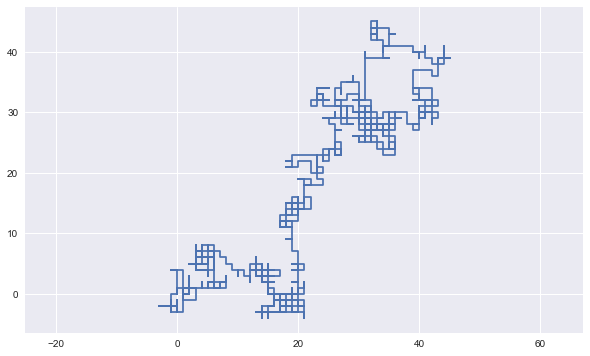

In [8]:
# this is a symmetric simple random walk over Z^2

n = 1000
mu = 0
x = np.zeros([1000, 2])
x[0, 0] = mu
i = npr.randint(1, 5, n)
for t in range(1, n):
    if i[t] == 1:
        x[t,0] = x[t - 1,0] + 1
        x[t,1] = x[t - 1,1]
    elif i[t] == 2:
        x[t,0] = x[t - 1,0] - 1
        x[t,1] = x[t - 1,1]
    elif i[t] == 3:
        x[t,0] = x[t - 1,0]
        x[t,1] = x[t - 1,1] + 1
    elif i[t] == 4:
        x[t,0] = x[t - 1,0]
        x[t,1] = x[t - 1,1] - 1
plt.plot(x[:,0], x[:,1]);
plt.axis('equal');

---

# ARIMA(0, 1, 0)
ARIMA(0, 1, 0), or I(1), is just a random walk<br>
$$y_t = \mu + y_{t - 1} + \epsilon_t$$

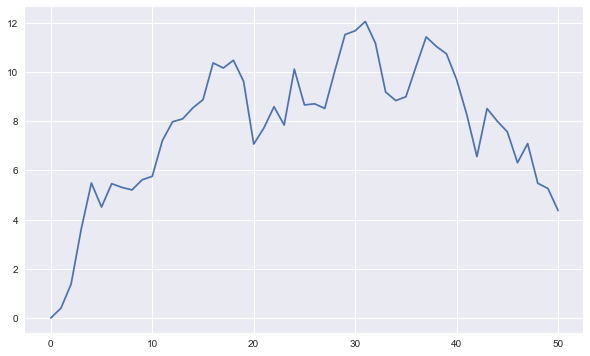

In [9]:
npr.seed(0) # uncomment for deterministic output; comment for random output
n = 50
wn = npr.standard_normal(n + 1)
mu = 0
x = np.linspace(0, n, n + 1)
y = np.zeros(n + 1)
y[0] = mu
for t in range(1, n + 1):
    y[t] = y[t - 1] + wn[t]
plt.plot(x, y);

---

# ARIMA(0, 0, 1)
ARIMA(0, 0, 1) is just Moving Average MA(1)<br>
$$\hat{y_t} = \mu + \theta_1\epsilon_{t - 1}$$
$$y_t = \mu + \epsilon_t + \theta_1\epsilon_{t - 1}$$

__MA(q) = ARIMA(0, 0, q)__<br>
$$\hat{y_t} = \mu + \theta_1\epsilon_{t - 1} + ... + \theta_q\epsilon_{t - q}$$
$$y_t = \mu + \epsilon_t + \theta_1\epsilon_{t - 1} + ... + \theta_q\epsilon_{t - q}$$

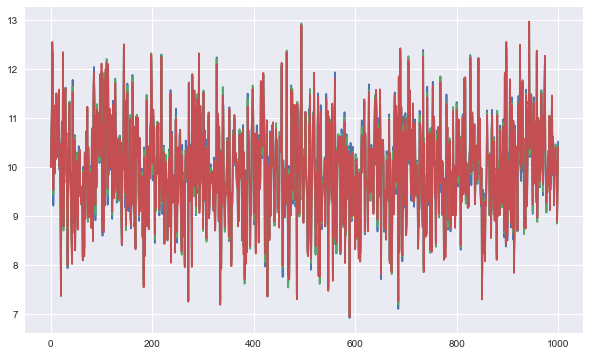

In [21]:
npr.seed(0) # uncomment for deterministic output; comment for random output

n     = 1000
wn    = npr.standard_normal(n + 1) # white noise error terms
mu    = 10
theta = np.array([0.1, 0.1, 0.1])  # weights
x     = np.linspace(0, n, n + 1)

y     = np.zeros(n + 1)
y[0]  = mu

y2    = np.zeros(n + 1)
y2[0] = mu

y3    = np.zeros(n + 1)
y3[0] = mu

for t in range(1, n + 1):
    y[t] = mu + wn[t] + np.dot(theta[:1], wn[t - 1])
    y2[t] = mu + wn[t] + np.dot(theta[:2], [wn[t - 1], wn[t - 2]])
    y3[t] = mu + wn[t] + np.dot(theta[:3], [wn[t - 1], wn[t - 2], wn[t - 3]])

plt.plot(x, y, x, y2, x, y3);

---
---
---

# DSP Digital Signal Processing and Filters

---

__SMA Simple Moving Average FIR Finite Impulse Response Filter__<br>
$$y[n] = \frac{1}{L} \sum_{k = 0}^{L - 1} x[n - k]$$

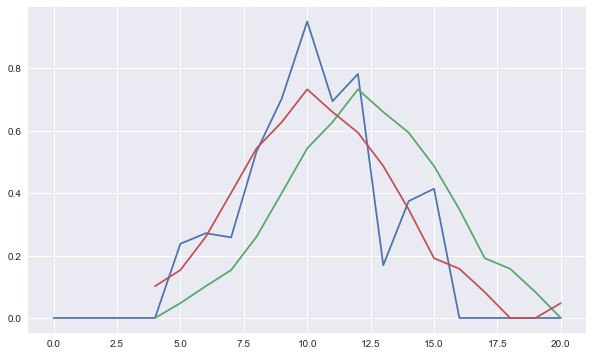

In [17]:
# a simple moving average filter implemented in NumPy
# the signal must be padded with a sufficient number 0s (i.e., "no signal") on either side of the signal

n = 10 # signal size
w = 5  # window size
x = np.linspace(0, n + 2 * w, n + 2 * w + 1)
y = np.concatenate([np.zeros(w), np.random.random(n + 1), np.zeros(w)])

roll_avg = np.convolve(y, np.ones(w), 'valid') / w
plt.plot(x, y);
plt.plot(x[w - 1:], roll_avg);
plt.plot(x[w - 1:], np.roll(roll_avg, -2));

---

experimenting with complex periodic sinusoidal waves

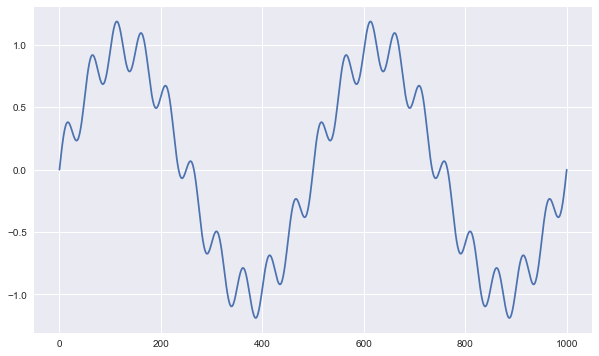

In [12]:
A1 = 1
f1 = 1e2
t = np.linspace(0, 0.02, 1001)
y1 = A1 * np.sin(2 * np.pi * f1 * t)
A2 = 0.2
f2 = 1e3
y2 = A2 * np.sin(2 * np.pi * f2 * t)
plt.plot(x, y1 + y2);

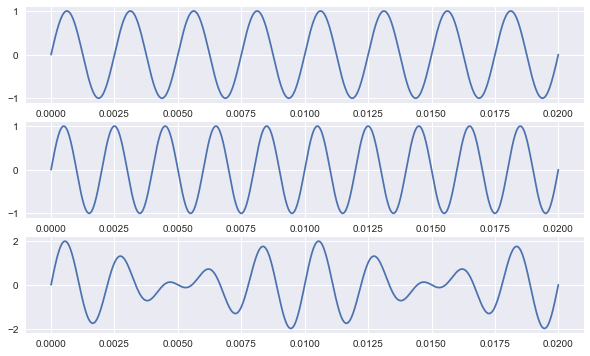

In [13]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 4e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 1
f2 = 5e2
y2 = A2 * np.sin(2 * np.pi * f2 * t)

fig, ax = plt.subplots(3);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y1 + y2);

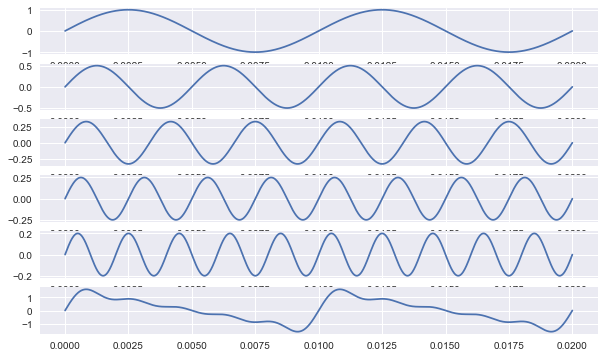

In [14]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 1e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 0.5
f2 = 2e2
y2 = A2 * np.sin(2 * np.pi * f2 * t)

A3 = 0.33
f3 = 3e2
y3 = A3 * np.sin(2 * np.pi * f3 * t)

A4 = 0.25
f4 = 4e2
y4 = A4 * np.sin(2 * np.pi * f4 * t)

A5 = 0.2
f5 = 5e2
y5 = A5 * np.sin(2 * np.pi * f5 * t)

fig, ax = plt.subplots(6);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y3)
ax[3].plot(t, y4)
ax[4].plot(t, y5)
ax[5].plot(t, y1 + y2 + y3 + y4 + y5);

---
---
---

# Resources

Goodfellow, Ian, Yoshua Bengio, & Aaron Courville. (2016). _Deep Learning_. MIT Press. [Home](https://www.deeplearningbook.org).<br>

Hastie, Trevor, Robert Tibshirani, & Jerome Friedman. (2009). _The Elements of Statistical Learning: Data Mining, Inference, and Prediction, 2nd Ed_. Springer Series in Statistics. [Home](https://web.stanford.edu/~hastie/ElemStatLearn/).<br>

Tan, Pang-Ning et al. (2019). _Introduction to Data Mining, 2nd Ed_. Pearson. [Home](https://www-users.cs.umn.edu/~kumar001/dmbook/index.php).<br>

https://en.wikipedia.org/wiki/Definite_symmetric_matrix<br>
https://en.wikipedia.org/wiki/Matrix_calculus<br>
https://en.wikipedia.org/wiki/Functional_derivative<br>
https://en.wikipedia.org/wiki/Optimality_criterion<br>
https://en.wikipedia.org/wiki/Residual_sum_of_squares<br>
https://www.youtube.com/watch?v=ZUU57Q3CFOU<br>
https://www.youtube.com/watch?v=MC7l96tW8V8<br>
https://www.youtube.com/watch?v=Z0wELiinNVQ<br>
http://www.cs.uu.nl/docs/vakken/mpr/linreg-math.pdf<br>
https://atmos.uw.edu/~dennis/MatrixCalculus.pdf<br>

---
---
---

In [ ]:
# toy data
data = {
    'tid': np.arange(1, 11),
    'home_owner': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
    'marital_status': ['Single', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Single'],
    'annual_income': [125e3, 100e3, 70e3, 120e3, 95e3, 60e3, 220e3, 85e3, 75e3, 90e3],
    'defaulted_borrower': ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes'],
}
df = pd.DataFrame(data)
df

In [ ]:
P_yes = df[df['defaulted_borrower']=='Yes'].shape[0]/df.shape[0]
P_no = df[df['defaulted_borrower']=='No'].shape[0]/df.shape[0]
P_no

---